<a href="https://colab.research.google.com/github/Santoshuske/Digit-Recognition/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

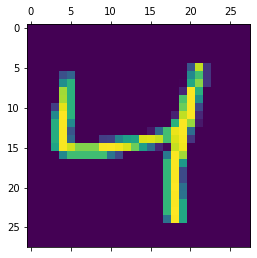

In [ ]:
plt.matshow(X_train[2])

In [ ]:
y_train[2]

4

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened.shape

(10000, 784)

In [ ]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4722 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9256


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2666 - accuracy: 0.9265


[0.2666185796260834, 0.9265000224113464]

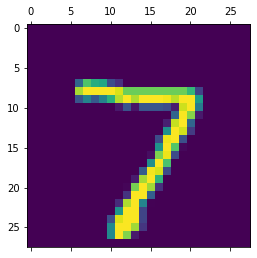

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.5055238e-02, 4.1853201e-07, 5.8342740e-02, 9.4731390e-01,
       1.6105452e-03, 1.1067245e-01, 2.0799866e-06, 9.9982190e-01,
       9.0485886e-02, 5.9017438e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    7,    8,    3,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    9,  930,   13,    6,    5,   11,   10,   41,    4],
       [   2,    0,   26,  912,    0,   26,    2,   11,   25,    6],
       [   1,    1,    6,    2,  908,    0,   12,    6,   12,   34],
       [   8,    3,    5,   26,    6,  788,   12,    6,   33,    5],
       [   8,    3,    7,    1,    7,   14,  912,    2,    4,    0],
       [   1,    5,   24,    4,    6,    0,    0,  960,    6,   22],
       [   4,    9,    7,   16,    8,   23,   10,   13,  880,    4],
       [   9,    7,    2,    9,   21,    8,    0,   33,   13,  907]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

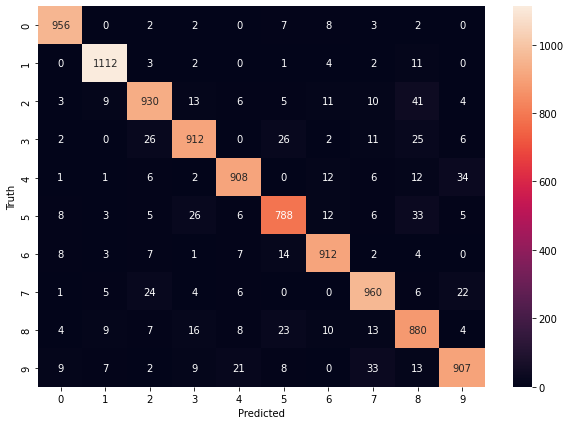

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1208 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0837 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9843


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9765


[0.08038248866796494, 0.9764999747276306]

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2756 - accuracy: 0.9209
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1308 - accuracy: 0.9609
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0917 - accuracy: 0.9729
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0705 - accuracy: 0.9783
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0563 - accuracy: 0.9830
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9858
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0369 - accuracy: 0.9883
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0313 - accuracy: 0.9904
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0253 - accuracy: 0.9921
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.022